# DS 2 : détail des notes

[Le fichier contenant les notes est ici.](https://raw.githubusercontent.com/cpge-itc/itc2/main/files/ds/ds2/ds2.csv)

## Chargement des notes

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize'] = (10, 5)
pd.options.display.float_format = '{:,.1f}'.format

df_ds2 = pd.read_csv("ds2.csv")
df_ds2 = df_ds2.iloc[1:, :]
df_ds2["rang"] = df_ds2["rang"].fillna(0).astype(int)
df_ds2.head()

,classe,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,id,note,rang
1,mp,5,2,1.0,NaN,NaN,5.0,0.0,4.0,NaN,...,NaN,NaN,NaN,5.0,1.0,NaN,NaN,0,NaN,0
2,mpp,5,5,5.0,4.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,4.0,2.0,1.0,NaN,15.3,4
3,mpp,5,5,5.0,4.0,5.0,3.0,3.0,5.0,3.0,...,5.0,5.0,5.0,5.0,5.0,5.0,NaN,77,14.4,11
4,mpp,5,5,5.0,4.0,5.0,5.0,2.0,3.0,1.0,...,5.0,NaN,NaN,5.0,2.0,NaN,NaN,2008,10.4,24
5,mpp,4,5,5.0,4.0,5.0,5.0,0.0,3.0,5.0,...,NaN,0.0,NaN,5.0,2.0,NaN,NaN,1712,8.4,30


Chaque colonne entre 1 et 17 correspond à une question. Chaque ligne correspond à un élève, dont l'identifiant `id` est la date d'anniversaire (2512 = 25 décembre).

## Moyenne, variance

In [2]:
df_ds2[["note", "classe"]].groupby("classe").agg(["mean", "std"], numeric_only=True) # mean = moyenne, std = écart-type

note    
       mean std
classe         
mp      NaN NaN
mpp    13.0 2.5
pcc    11.0 2.5

## Classement

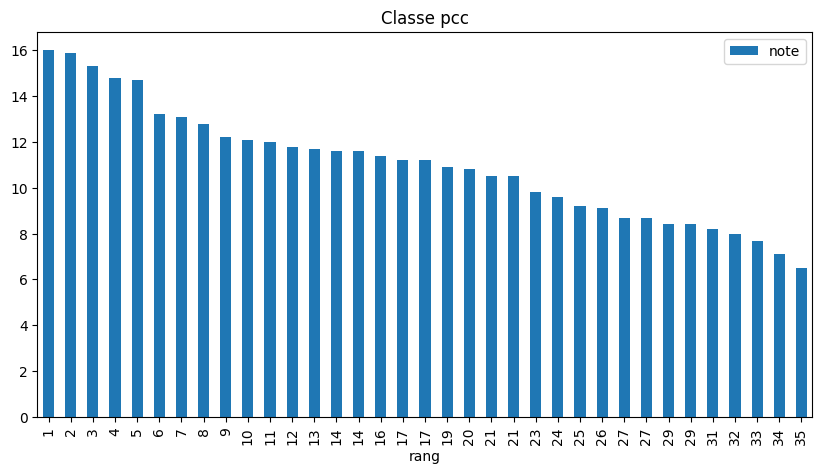

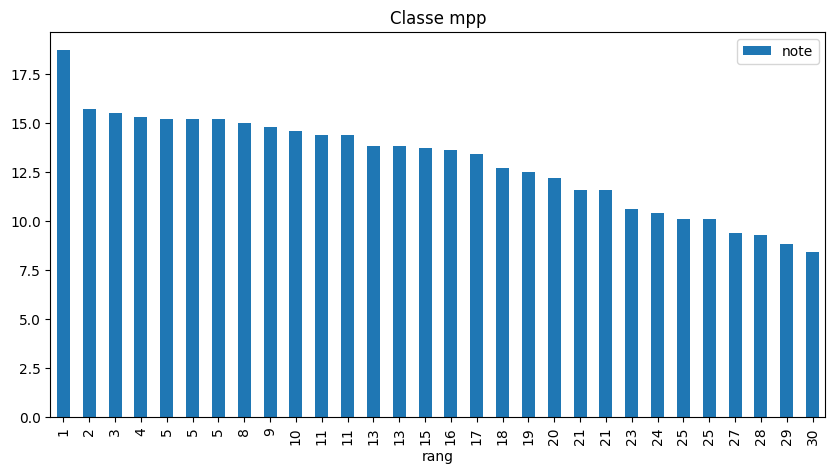

In [3]:
for c in ["pcc", "mpp"]:
    df_ds2.query(f"classe == '{c}'")[["note", "rang"]].set_index("rang").sort_values(by="note", ascending=False).plot.bar(title=f"Classe {c}")
    plt.show()

## Résultats par question

<AxesSubplot:title={'center':'Taux de réussite par question'}>

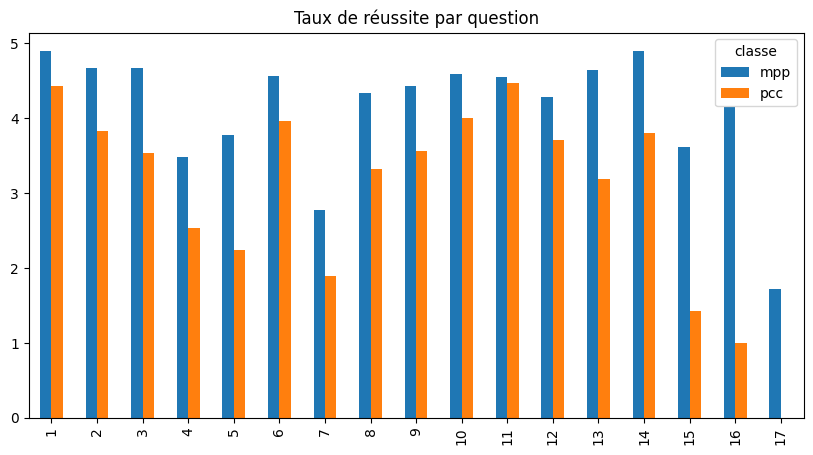

In [4]:
df_questions = df_ds2[list(map(str, range(1, 18))) + ["classe"]]
df_questions.query("classe in ['mpp', 'pcc']").groupby("classe").mean(numeric_only=True).T.plot.bar(title="Taux de réussite par question")

<AxesSubplot:title={'center':'Pourcentage de réponses par question'}>

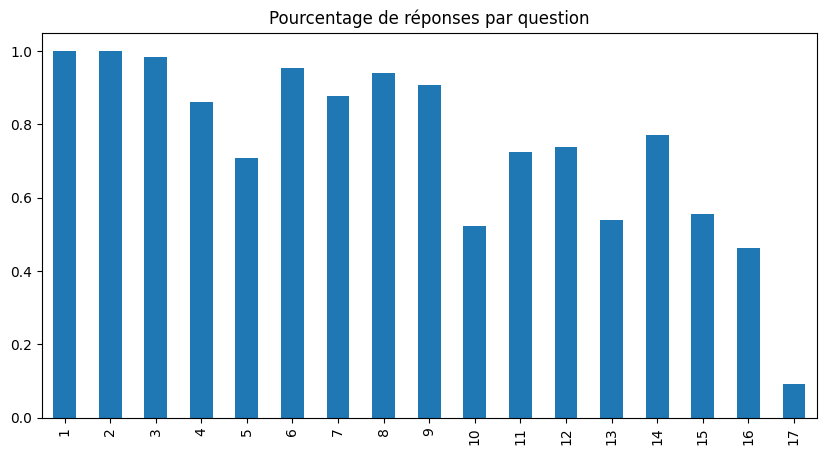

In [5]:
n_eleves = len(df_questions) - 1
((n_eleves - df_questions.drop(columns="classe").isnull().sum())/n_eleves).plot.bar(title="Pourcentage de réponses par question")